# Deep Learning Final Project

## This notebook shows how to plot the scatter plot to see the evolution and the loss / accuracy curves of our final models.

In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class Individual:

    def __init__(self, part1, part2):
        self.part1 = part1
        self.part2 = part2
        self.score = {"accuracy": 0, "parameters": 0}

### Set the save path and load path

In [ ]:
def save_history(path,h):
  with open(path, "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump(h, f)

def load_history(path):
  with open(path, "rb") as f: # "rb" because we want to read in binary mode
    history = pickle.load(f)
  return history


def save_population(population,generation):
  save_path = "/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/populations/population-{}.bin".format(generation)
  with open(save_path, "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump(population, f)

def load_population(population):
  with open("/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/populations/population-{}.bin".format(population), "rb") as f: # "rb" because we want to read in binary mode
    population_load = pickle.load(f)
  return population_load


In [ ]:
model_1_path = "/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/model/model1.pth"
model_2_path = "/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/model/model2.pth"

model_1_history_path = "/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/history/model1_training_history.bin"
model_2_history_path = "/content/drive/MyDrive/ECE7123-deeplearning/final-proj/submit/history/model2_training_history.bin"



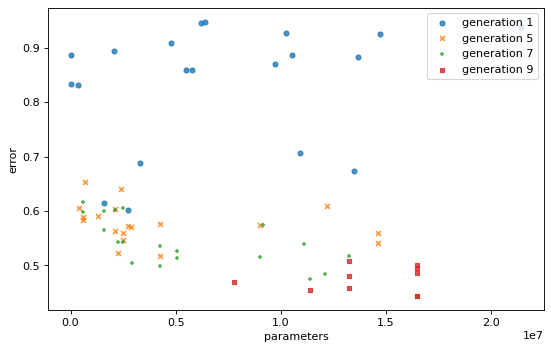

In [ ]:
marker = ["o","x","+","s"]
legend = []
plt.figure(figsize=(8, 5), dpi=80)
def plot_scatter(population,idx,generation):
  y = [1 - x.score['accuracy'] for x in population]
  x = [x.score['parameters'] for x in population]
  jittered_y = y + 0.1 * np.random.rand(len(y)) -0.05
  jittered_x = x + 0.1 * np.random.rand(len(x)) -0.05
  legend.append("generation " + str(generation))
  plt.scatter(jittered_x,jittered_y,marker=marker[idx],s=20,alpha=0.8)

population_1 = load_population(1)
population_5 = load_population(5)
population_7 = load_population(7)
population_9 = load_population(9)[:9]

plot_scatter(population_1,0,1)
plot_scatter(population_5,1,5)
plot_scatter(population_7,2,7)
plot_scatter(population_9,3,9)
plt.xlabel("parameters")
plt.ylabel("error")
plt.legend(legend,loc='upper right')

In [ ]:
def plot_history(train_history, test_history):

  train_loss = [x[0] for x in train_history]
  test_loss = [x[0] for x in test_history]

  train_acc =  [x[1] for x in train_history]
  test_acc = [x[1] for x in test_history] 

  # epoch = range(1,len(train_history)+1)

  plt.figure(figsize=(12, 12), dpi=80)
  fig, (ax1, ax2) = plt.subplots(2)
  # epoch = range(1,len(train_history_load)+1)
  # ax1.set_xticks(epoch)
  ax1.set_xlabel("epoch")
  ax1.set_ylabel("loss")
  ax1.set_title("loss curve (model 1)")
  ax1.plot(train_loss)
  ax1.plot(test_loss)
  ax1.legend(["train loss", "test loss"],loc='upper right')


  # plt.figure(figsize=(8, 5), dpi=80)
  # ax2.set_xticks(epoch)
  ax2.set_xlabel("epoch")
  ax2.set_ylabel("accuracy")
  ax2.set_title("accuracy curve (model 1)")
  ax2.plot(train_acc)
  ax2.plot(test_acc)
  ax2.legend(["train accuracy", "test accuracy"],loc='lower right')

### The loss / accuracy curves of final model 1

<Figure size 960x960 with 0 Axes>

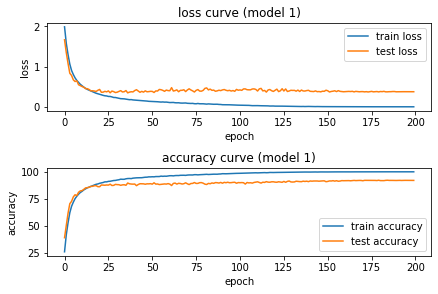

In [ ]:
history_load = load_history(model_1_history_path)
train_history_load = history_load['train'][:201]
test_history_load = history_load['test'][:201]
plot_history(train_history_load,test_history_load)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Loss / Accuracy curves of final model 2

<Figure size 960x960 with 0 Axes>

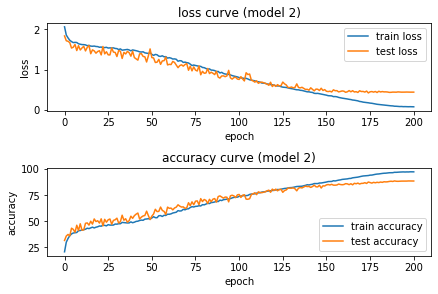

In [ ]:
history_load = load_history(model_2_history_path)
train_history_load = history_load['train'][:201]
test_history_load = history_load['test'][:201]
plot_history(train_history_load,test_history_load)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)